# Alucar - Analisando as vendas

In [1]:
import pandas as pd

In [3]:
pd.read_csv("alucar.csv").head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
alucar = pd.read_csv("alucar.csv")

In [5]:
print(f"Quantidade de linhas e colunas {alucar.shape}")

Quantidade de linhas e colunas (24, 2)


In [7]:
print(f"Quantidade de dados nulos: {alucar.isna().sum().sum()}" )

Quantidade de dados nulos: 0


In [8]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [9]:
alucar["mes"] = pd.to_datetime(alucar["mes"])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [11]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [12]:
print(sns.__version__)

0.11.1


<AxesSubplot:xlabel='mes', ylabel='vendas'>

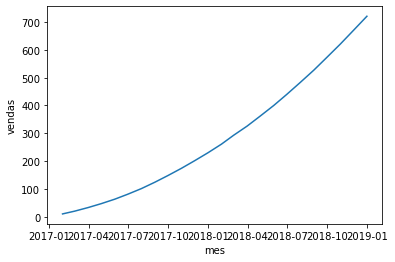

In [14]:
sns.lineplot(x="mes", y="vendas", data=alucar)

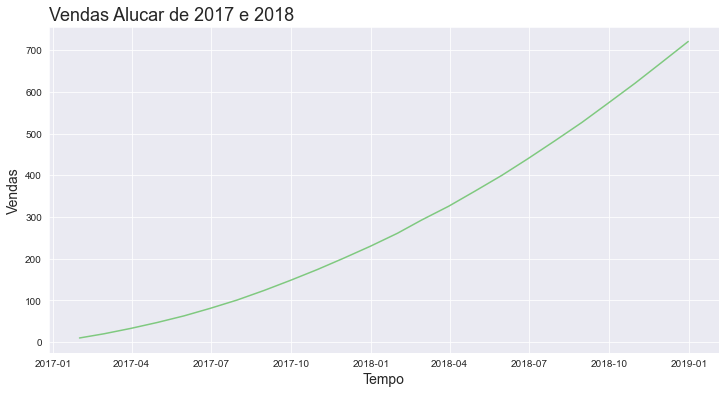

In [24]:
sns.set_palette("Accent")
sns.set_style("darkgrid")
ax = sns.lineplot(x="mes", y="vendas", data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title("Vendas Alucar de 2017 e 2018", loc="left", fontsize=18)
ax.set_xlabel("Tempo", fontsize=14)
ax.set_ylabel("Vendas", fontsize=14)
ax = ax